In [1]:
# Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
# from pandas_datareader import data as pdr
import yfinance as yf

In [3]:
# Load the data
# Im not using google colab and have the data so alt method 
# from google.colab import files
# uploaded = files.upload()

# alt method using yfinace

# yf.pdr_override() # <== that's all it takes :-)

# start_date = '2015-01-01'  # YYYY-MM-DD
# end_date = '2020-05-15'
# df = pdr.get_data_yahoo('SPY', start_date, end_date)

In [4]:
# or this method 
#define the ticker symbol
tickerSymbol = 'MSFT'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2020-1-1', end='2020-6-9')

#period: the frequency at which to gather the data; common options would include ‘1d’ (daily), ‘1mo’ (monthly), ‘1y’ (yearly)
#start: the date to start gathering the data. For example ‘2010–1–1’
#end: the date to end gathering the data. For example ‘2020–1–25’

#see your data
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,157.91,159.85,157.46,159.74,22622100,0.0,0
2020-01-03,157.45,159.07,157.19,157.75,21116200,0.0,0
2020-01-06,156.22,158.23,155.65,158.16,20813700,0.0,0
2020-01-07,158.44,158.79,156.46,156.71,21634100,0.0,0
2020-01-08,158.06,159.92,157.08,159.21,27746500,0.0,0
...,...,...,...,...,...,...,...
2020-06-02,184.25,185.00,181.35,184.91,30794600,0.0,0
2020-06-03,184.82,185.94,183.58,185.36,27311000,0.0,0
2020-06-04,184.30,185.84,182.30,182.92,28761800,0.0,0


In [5]:
# Get the number of trading days 
df = tickerDf
df.shape
# 99 days

(109, 7)

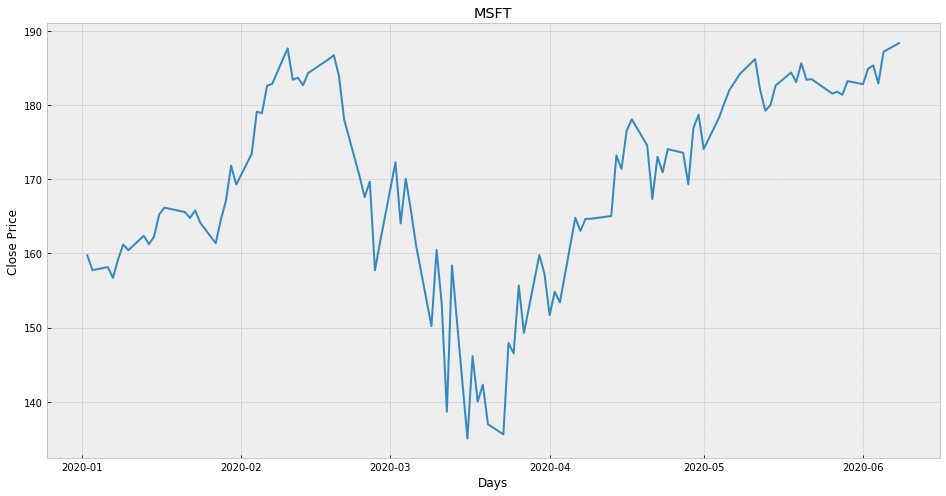

In [6]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title(tickerSymbol)
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])

In [7]:
#Get the close price
df = tickerDf[['Close']]
df.head(4)

,Close
Date,
2020-01-02,159.74
2020-01-03,157.75
2020-01-06,158.16
2020-01-07,156.71


In [8]:
#Create a variable to predict 'x' days out into the future
future_days = 25
#Create a new column (target data)
#Trying to predict values x days way
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(4)

C:\Users\alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Close,Prediction
Date,,
2020-01-02,159.74,182.88
2020-01-03,157.75,187.66
2020-01-06,158.16,183.43
2020-01-07,156.71,183.70


In [9]:
# Create the feature data set (X) and convert it to a numpy array and 
# remove the last 'x' rows/days
# Drop the prediction column, and want all the rows except the last X days
X = np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[159.74]
 [157.75]
 [158.16]
 [156.71]
 [159.21]
 [161.2 ]
 [160.45]
 [162.38]
 [161.24]
 [162.28]
 [165.26]
 [166.18]
 [165.59]
 [164.79]
 [165.8 ]
 [164.13]
 [161.39]
 [164.55]
 [167.12]
 [171.83]
 [169.29]
 [173.42]
 [179.13]
 [178.91]
 [182.62]
 [182.88]
 [187.66]
 [183.43]
 [183.7 ]
 [182.7 ]
 [184.33]
 [186.2 ]
 [186.76]
 [183.91]
 [178.09]
 [170.42]
 [167.6 ]
 [169.7 ]
 [157.74]
 [161.56]
 [172.31]
 [164.05]
 [170.08]
 [165.81]
 [161.12]
 [150.2 ]
 [160.47]
 [153.2 ]
 [138.67]
 [158.39]
 [135.04]
 [146.16]
 [140.01]
 [142.31]
 [136.97]
 [135.6 ]
 [147.93]
 [146.51]
 [155.68]
 [149.28]
 [159.78]
 [157.27]
 [151.69]
 [154.83]
 [153.4 ]
 [164.81]
 [163.04]
 [164.67]
 [164.68]
 [165.05]
 [173.22]
 [171.4 ]
 [176.55]
 [178.1 ]
 [174.57]
 [167.35]
 [173.04]
 [170.94]
 [174.07]
 [173.57]
 [169.34]
 [176.94]
 [178.71]
 [174.09]]


In [10]:
# Create the target data set (y) and convert it to a numpy array and get all
# of the target values except the last 'x' rows or days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[182.88 187.66 183.43 183.7  182.7  184.33 186.2  186.76 183.91 178.09
 170.42 167.6  169.7  157.74 161.56 172.31 164.05 170.08 165.81 161.12
 150.2  160.47 153.2  138.67 158.39 135.04 146.16 140.01 142.31 136.97
 135.6  147.93 146.51 155.68 149.28 159.78 157.27 151.69 154.83 153.4
 164.81 163.04 164.67 164.68 165.05 173.22 171.4  176.55 178.1  174.57
 167.35 173.04 170.94 174.07 173.57 169.34 176.94 178.71 174.09 178.34
 180.26 182.03 183.09 184.17 186.22 182.   179.25 180.03 182.65 184.4
 183.12 185.66 183.43 183.51 181.57 181.81 181.4  183.25 182.83 184.91
 185.36 182.92 187.2  188.36]


In [11]:
# Split the data into 75% training and 25% testing
#  train_test_split(feature,target,testsize)                                            
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [12]:
# Create the models 
# Create the decision tree regressor model 
tree = DecisionTreeRegressor().fit(x_train,y_train)
# Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [13]:
# Get the last 'x' rows of the feature data set
#                                   want all the rows except the last x rows
x_future = df.drop(['Prediction'],1)[:-future_days]
# Get the last x days 
x_future = x_future.tail(future_days)
# Convert to numpy array 
x_future = np.array(x_future)
x_future

array([[149.28],
       [159.78],
       [157.27],
       [151.69],
       [154.83],
       [153.4 ],
       [164.81],
       [163.04],
       [164.67],
       [164.68],
       [165.05],
       [173.22],
       [171.4 ],
       [176.55],
       [178.1 ],
       [174.57],
       [167.35],
       [173.04],
       [170.94],
       [174.07],
       [173.57],
       [169.34],
       [176.94],
       [178.71],
       [174.09]])

In [14]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
# Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[173.22 180.26 182.03 173.22 174.09 186.22 182.65 179.25 182.65 182.65
 184.4  183.12 161.12 183.43 183.51 181.57 181.81 181.4  183.25 188.36
 184.91 185.36 182.92 138.67 188.36]

[178.78754651 172.67417942 174.13556527 177.38438321 175.55619533
 176.38877771 169.74558547 170.7761245  169.82709703 169.82127478
 169.60585137 164.84906954 165.90871984 162.91025884 162.00780941
 164.0630652  168.26673286 164.95387012 166.17654354 164.35417792
 164.64529064 167.10810424 162.68319092 161.65265189 164.34253341]


C:\Users\alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


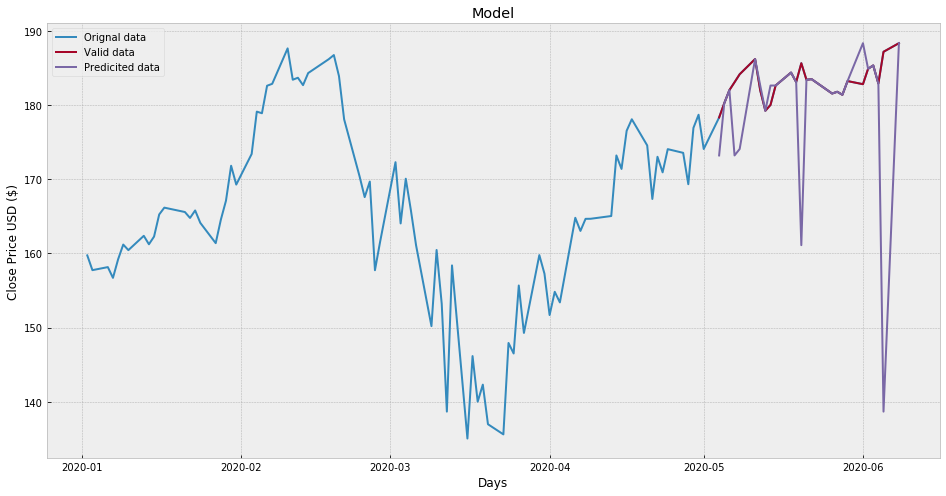

In [17]:
# Visualize the data 
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orignal data','Valid data','Predicited data'])
plt.show()

C:\Users\alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


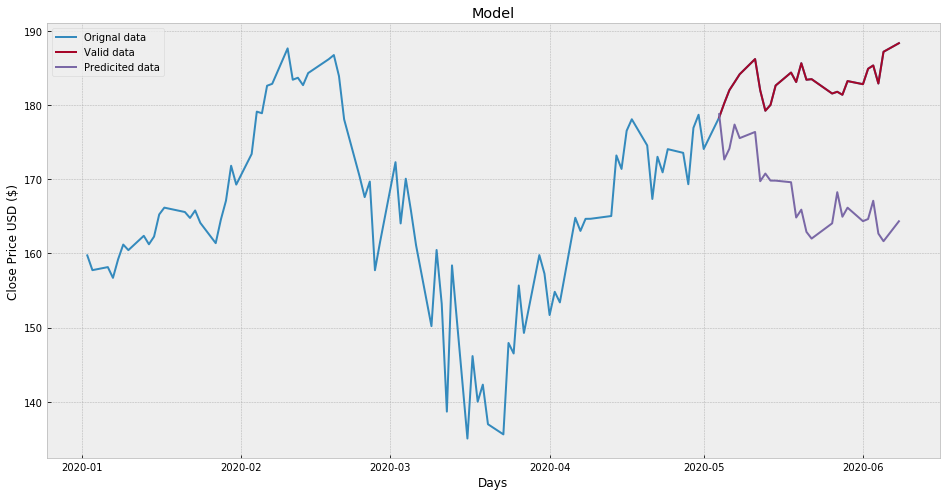

In [16]:
# Visualize the data 
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orignal data','Valid data','Predicited data'])
plt.show()